C:\Users\ibrah\AppData\Local\Temp\ipykernel_5284\1869491453.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


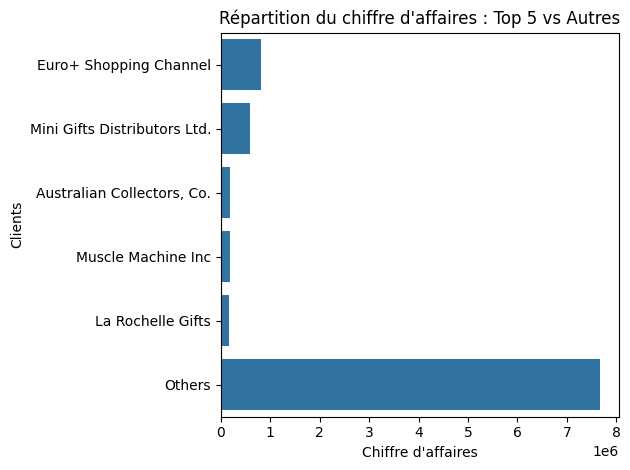

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
os.chdir("C:/Users/ibrah/OneDrive/Documents/classicmodel-analysis")
from src.database.connection import get_connection


conn = get_connection()

query = """
    SELECT c.customerName,
           SUM(od.quantityOrdered * od.priceEach) AS total_sales
    FROM customers c
    JOIN orders o USING(customerNumber)
    JOIN orderdetails od USING(orderNumber)
    GROUP BY c.customerName
    ORDER BY total_sales DESC;
    """

df = pd.read_sql(query, conn)

    # Séparer top 5
top5 = df.head(5).copy()

    # Calculer le reste
others_total = df.iloc[5:]['total_sales'].sum()

others = pd.DataFrame({
        "customerName": ["Others"],
        "total_sales": [others_total]
    })

final_df = pd.concat([top5, others], ignore_index=True)

plt.figure()
sns.barplot(data=final_df, x='total_sales', y='customerName')

plt.title("Répartition du chiffre d'affaires : Top 5 vs Autres")
plt.xlabel("Chiffre d'affaires")
plt.ylabel("Clients")

plt.tight_layout()
plt.savefig("visualisations/customer_revenue.png")
plt.show()